In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("../dataset/2.preprocessed_data_clean.csv", engine='python')
data = data.drop(columns = ["Source"])

In [3]:
data.dropna(subset = ["Text"], inplace=True)

In [4]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
text_content = data['Text']
text  = tfidf.fit_transform(text_content)
text_content.head()

0    autocomplet result avail use arrow review ente...
1    2020 2019 2018 2017 2016 2015 2014 2013 2012 2...
2    statement resum 73rd world health assembl chai...
3    global public health day offer great potenti r...
4    autocomplet result avail use arrow review ente...
Name: Text, dtype: object

In [5]:
type(text_content)

pandas.core.series.Series

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


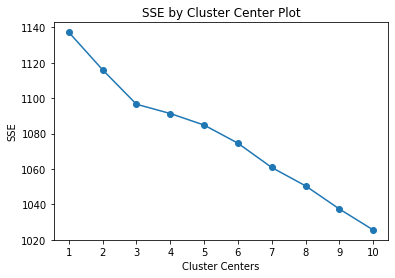

In [6]:
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text , 10)

In [7]:
clusters = MiniBatchKMeans(n_clusters=3, init_size =6000, batch_size=1081, random_state=20).fit_predict(text)

In [8]:
for i in clusters :
    print(i)

2
2
2
1
2
2
2
2
2
2
1
1
1
1
2
1
2
2
2
1
2
1
2
2
1
2
2
2
1
2
2
2
0
1
2
1
1
1
1
2
1
2
2
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
2
1
2
1
1
1
1
1
1
1
2
2
2
1
2
2
2
2
2
2
1
1
1
1
2
1
2
2
1
2
1
2
2
1
2
2
2
1
2
2
2
0
2
1
1
1
2
1
2
2
2
2
2
1
1
1
1
2
2
1
1
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
1
2
2
2
2
1
1
2
2
2
2
0
2
0
2
2
1
2
2
1
2
2
2
2
2
1
2
2
1
2
1
0
2
0
1
1
2
2
1
2
2
1
0
2
0
2
1
2
2
2
2
2
0
2
0
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
0
2
1
1
1
1
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
2
2
2
2
1
1
2
2
2
2
0
2
0
2
2
1
2
2
1
2
2
2
2
2
1
2
2
1
2
1
0
2
0
1
1
2
2
1
2
2
1
0
2
0
2
1
2
2
2
2
2
0
2
0
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
0
2
1
1
1
1
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
1
1
2
2
2
2
0
2
0
2
2
1
2
2
1
2
2
2
2
2
1
2
2
1
2
1
0
2
0
1
1
2
2
1
2
2
1
0
2
0
2
1
2
2
2
2
2
0
2
0
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
0
2
1
1
1
1
2
2


In [9]:
max(clusters)

2

In [10]:
data.index
data.to_csv(r'../dataset/3.corona_no_corona_kmeans.csv', index = False)

In [11]:
data = pd.read_csv("../dataset/3.corona_no_corona_kmeans.csv", engine='python')


In [12]:
data['label'] = 0
for position in data.index :
    data['label'][position] = clusters[position]


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
data.to_csv(r'../dataset/3.corona_no_corona_kmeans.csv', index = False)

In [14]:
data

,Unnamed: 0,Text,label
0,0,autocomplet result avail use arrow review ente...,2
1,1,2020 2019 2018 2017 2016 2015 2014 2013 2012 2...,2
2,2,statement resum 73rd world health assembl chai...,2
3,3,global public health day offer great potenti r...,1
4,4,autocomplet result avail use arrow review ente...,2
...,...,...,...
1173,1196,peopl across world celebr one holiest time chr...,1
1174,1197,hawaiian shirt gravi christma tribut love one ...,1
1175,1198,limit far could travel pictur border colli oll...,1
1176,1199,m8 glasgow citi eastbound sever disrupt j16 ca...,0


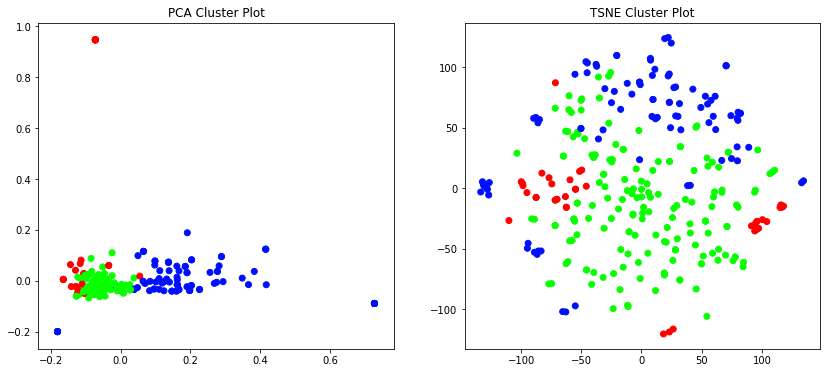

In [15]:
def plot_tsne_pca(data, labels):
    max_label = max(labels) + 1
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text , clusters)
    

In [16]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
control,four,bbc,live,seven,center,twenti,save,peopl,young

Cluster 1
day,say,one,read,defens,uk,said,health,next,year

Cluster 2
state,cdc,avail,case,spread,vaccin,test,health,19,covid


In [17]:
data = pd.read_csv("../dataset/3.corona_no_corona_kmeans.csv", engine='python')


In [18]:
data

,Unnamed: 0,Text,label
0,0,autocomplet result avail use arrow review ente...,2
1,1,2020 2019 2018 2017 2016 2015 2014 2013 2012 2...,2
2,2,statement resum 73rd world health assembl chai...,2
3,3,global public health day offer great potenti r...,1
4,4,autocomplet result avail use arrow review ente...,2
...,...,...,...
1173,1196,peopl across world celebr one holiest time chr...,1
1174,1197,hawaiian shirt gravi christma tribut love one ...,1
1175,1198,limit far could travel pictur border colli oll...,1
1176,1199,m8 glasgow citi eastbound sever disrupt j16 ca...,0


In [19]:
data_no_outliers = pd.DataFrame()
data_no_outliers['Text'] = ''
count = 0
for i in data.index :
    if ((data['label'][i] == 0) or (data['label'][i] == 2)) :
        data_no_outliers = data_no_outliers.append({'Text': data['Text'][i]} , ignore_index=True)
        count += 1
        print(data['Text'][i])
data_no_outliers.to_csv(r'../dataset/4.data_no_outliers.csv', index = False)


autocomplet result avail use arrow review enter select
2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 headquart hq antimicrobi resist divis busi oper academi communic diseas climat determin health framework convent tobacco control dgo deputi director gener offic data analyt deliveri director gener offic emerg respons access medicin health product chief scientist scienc divis extern relat govern uhc life cours uhc communic noncommunic diseas uhc healthier popul emerg prepared health metric measur health secur environ special initi health emerg programm special programm tdr sci staff health insur fnm bo polio erad dgo pandem influenza prepared wpe polio emerg countri collabor organ common charg expenditur bo noncommunic diseas mental health partnership matern newborn child health uhl access medicin vaccin pharmaceut famili woman child health gener manag exd offic health emerg prepared special programm hrp uhl allianc health polici system research sci hiv 

data coronaviru diseas covid 19 pandem current avail directli sourc plea note gho api current provid covid 19 data data extract situat dashboard avail unocha humanitarian data exchang hdx platform content provid set regularli updat csv file
global 9 33am cet 27 decemb 2020 79 062 802 confirm case covid 19 includ 1 751 311 death report
identifi health inequ driver essenti achiev health equiti thirteenth global programm work gpw13 monitor health inequ crucial identifi differ health differ popul subgroup provid evid left behind inform health polici programm practic aim close exist gap achiev health equiti health equiti monitor provid evid exist health inequ make avail tool resourc health inequ monitor
autocomplet result avail use arrow review enter select
autocomplet result avail use arrow review enter select
world midst covid 19 pandem partner work togeth respons track pandem advis critic intervent distribut vital medic suppli need race develop deploy safe effect vaccin vaccin save milli

student show sign covid 19 need isol quick guid school nurs school covid 19 poc
higher risk sever ill poster learn higher risk sever ill covid 19
guidanc help administr manag limit exposur spread covid 19
know factsheet protect covid 19
health equiti everyon opportun healthi possibl long stand system health social inequ put mani racial ethnic minor group increas risk get sick die covid 19 stop spread covid 19 move toward greater health equiti must work togeth ensur resourc avail maintain manag physic mental health includ easi access inform afford test medic mental health care
around someon diagnos covid 19 someon health depart may call answer call help slow spread covid 19 commun short video inform public contact trace respond call contact tracer
commun mitig strategi cdc commun mitig framework action individu busi health depart commun set school take slow spread covid 19
perform broad base test prepar broad base viral test facil known suspect sar cov 2 exposur moder substanti transmis

today presid trump take anoth step protect health american peopl requir air passeng arriv unit kingdom k test neg via pcr antigen test 72 hour departur k unit state public health author unit kingdom recent announc discoveri new variant sar cov 2 virus constantli chang mutat preliminari analysi k suggest new variant may 70 transmiss previous circul variant march 14 presid trump issu presidenti proclamationextern icon suspend entri foreign nation visit unit kingdom past 14 day reduc air travel k 90 addit test requir fortifi protect american public improv health safeti ensur respons intern travel order consist exist cdc test guidanc plu hh depart transport depart homeland secur joint guidanc runway recoverypdf iconextern icon document new order consist measur taken far increas abil detect contain covid 19 proactiv aggress passeng requir get viral test e test current infect within 3 day flight k depart provid written document laboratori test result hard copi electron airlin airlin must con

thing need know learn need know covid 19 pandem protect famili learn
center diseas control prevent cdc twenti four seven save live protect peopl
student show sign covid 19 need isol quick guid school nurs school covid 19 poc
higher risk sever ill poster learn higher risk sever ill covid 19
guidanc help administr manag limit exposur spread covid 19
know factsheet protect covid 19
health equiti everyon opportun healthi possibl long stand system health social inequ put mani racial ethnic minor group increas risk get sick die covid 19 stop spread covid 19 move toward greater health equiti must work togeth ensur resourc avail maintain manag physic mental health includ easi access inform afford test medic mental health care
around someon diagnos covid 19 someon health depart may call answer call help slow spread covid 19 commun short video inform public contact trace respond call contact tracer
commun mitig strategi cdc commun mitig framework action individu busi health depart commun set sch

81 000 drug overdos death occur unit state 12 month end may 2020 highest number overdos death ever record 12 month period accord recent provision data center diseas control prevent cdc overdos death alreadi increas month preced 2019 novel coronaviru diseas covid 19 pandem latest number suggest acceler overdos death pandem disrupt daili life due covid 19 pandem hit substanc use disord hard said cdc director robert redfield continu fight end pandem import lose sight differ group affect way need take care peopl suffer unintend consequ synthet opioid primarili illicitli manufactur fentanyl appear primari driver increas overdos death increas 38 4 percent 12 month period lead june 2019 compar 12 month period lead may 2020 time period 37 38 jurisdict avail synthet opioid data report increas synthet opioid involv overdos death 18 jurisdict report increas greater 50 percent 10 western state report 98 percent increas synthet opioid involv death overdos death involv cocain also increas 26 5 perce

know factsheet protect covid 19
health equiti everyon opportun healthi possibl long stand system health social inequ put mani racial ethnic minor group increas risk get sick die covid 19 stop spread covid 19 move toward greater health equiti must work togeth ensur resourc avail maintain manag physic mental health includ easi access inform afford test medic mental health care
around someon diagnos covid 19 someon health depart may call answer call help slow spread covid 19 commun short video inform public contact trace respond call contact tracer
commun mitig strategi cdc commun mitig framework action individu busi health depart commun set school take slow spread covid 19
perform broad base test prepar broad base viral test facil known suspect sar cov 2 exposur moder substanti transmiss commun
end home isol person covid 19 symptom direct care home may discontinu isol follow condit least 10 day pas sinc symptom onset least 24 hour pas sinc fever resolv without use fever reduc medic sympt

covid 19 spread easili indoor outdoor studi show peopl like expo covid 19 closer 6 foot apart longer period time like expo covid 19 attend crowd poorli ventil indoor event close contact infect peopl home le like expo covid 19
lite icon safeti covid 19 vaccin top prioriti vaccin safeti system ensur vaccin safe possibl learn feder partner work togeth ensur safeti covid 19 vaccin cdc develop new tool safe addit layer safeti monitor increas abil rapidli detect safeti issu covid 19 vaccin safe new smartphon base vaccin health checker peopl receiv covid 19 vaccin
số ca bệnh tỉ lệ nhập viện và tử vong vì covid 19 trên toàn hoa kỳ đang tăng lên thực hiện các bước làm chậm sự lâi lan covid 19
covid 19 lâi lan dễ hơn trong nhà với ngoài trời các nghiên cứu cho thấi mọi người dễ phơi nhiễm với covid 19 khi họ ở gần hơn 6 foot với người khác trong giai đoạn thời gian dài hơn quý vị có nhiều khả năng phơi nhiễm với covid 19 khi quý vị tham gia các sự kiện trong nhà đông người có thông gió kém có ti

vape increasingli popular bethan take look advertis home town spot buse take student school vape advert although health expert say vape better smoke question whether right advertis product aim adult transport specif young peopl found potenti loophol way vape advertis find stori young peopl bbc young report websit
callum told suffer stutter sinc age seven spent life walk thesauru think word could use replac one say make order restaur lesson school even say name callum say stutter use affect everi aspect life discov group help take control speech inspir help struggl way world find stori young peopl bbc young report websit
teenag west midland urg young girl find voic speak upskirt upskirt imag taken underneath victim cloth without permiss often undetect morgan target local swim pool two year ago 17 tri rais awar law came forc last april make upskirt crimin offenc england wale morgan region winner bbc young report competit project work thousand young peopl everi year give chanc develop med

becom reinfect coronaviru alreadi bbc health report rachel schraer take look know far immun covid 19 motion graphic jacquelin galvin
read page see form need visit mobil version bbc websit submit question comment email u haveyoursay bbc co uk plea includ name age locat submiss
video caption covid classroom pandem chang u teacher live covid classroom pandem chang u teacher live
jez want known entrepreneur put midland map zack aim give someth back young peopl struggl school like two young businessmen began busi differ way school manag adapt keep run pandem find stori young peopl bbc young report websit follow bbc young report twitter youtub
100 day sinc uk went lockdown affect everyon differ four young peopl group young refuge get sinc coronaviru pandem complet chang live isabel qai leah inarah barnet refuge action club upload experi coronaviru stori bbc young report find stori young peopl bbc young report websit
school remain close young peopl uk find skill learn home rather classroom ad